## 7.4. Sinif Dengesizligi - Odev

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
kanser = pd.read_excel("cleveland.xlsx")
kanser.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [3]:
kanser['num'] = kanser.num.replace({'positive':1, 'negative':0})

Kanserli Hasta Orani : %7.51
Diger Hasta Orani   : %92.49


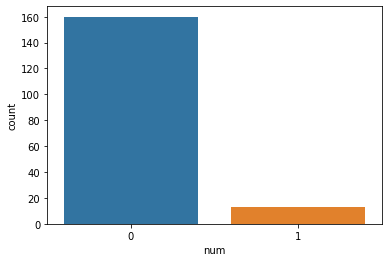

In [4]:
sns.countplot(kanser.num)
print("Kanserli Hasta Orani : %{:.2f}".format(sum(kanser.num)/len(kanser.num)*100))
print("Diger Hasta Orani   : %{:.2f}".format((len(kanser.num)-sum(kanser.num))/len(kanser.num)*100))

In [5]:
def model_olustur(X, Y):
    X_egitim, X_test, Y_egitim, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = Y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_egitim, Y_egitim)

    tahmin_egitim = logreg_model.predict(X_egitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(Y_egitim, tahmin_egitim)
    hata_matrisi_test = confusion_matrix(Y_test, tahmin_test)
    print("Modelin dogruluk degeri : ",  logreg_model.score(X_test, Y_test))
    print("Egitim veri kümesi")
    print(classification_report(Y_egitim,tahmin_egitim) )
    print("Test veri kümesi")
    print(classification_report(Y_test,tahmin_test) )
    return  None

In [6]:
X = kanser.drop('num', axis=1)
Y = kanser['num']
model_olustur(X,Y)

Modelin dogruluk degeri :  0.9428571428571428
Egitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.70      0.82        10

    accuracy                           0.98       138
   macro avg       0.99      0.85      0.91       138
weighted avg       0.98      0.98      0.98       138

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.33      0.50         3

    accuracy                           0.94        35
   macro avg       0.97      0.67      0.73        35
weighted avg       0.95      0.94      0.93        35



#### 1. Orneklem Arttirma

In [9]:
from sklearn.utils import resample

diger_hasta = kanser[kanser.num == 0]
kanserli_hasta = kanser[kanser.num == 1]

kanserli_hasta_artirilmis = resample(kanserli_hasta,
                                     replace = True,
                                     n_samples = len(diger_hasta),
                                     random_state = 111)

artirilmis_kanser = pd.concat([diger_hasta, kanserli_hasta_artirilmis])
artirilmis_kanser.num.value_counts()

1    160
0    160
Name: num, dtype: int64

In [11]:
X = artirilmis_kanser.drop('num', axis=1)
Y = artirilmis_kanser['num']
model_olustur(X,Y)

Modelin dogruluk degeri :  0.953125
Egitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       128
           1       0.96      1.00      0.98       128

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.91      1.00      0.96        32

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64



#### 2. Orneklem Azaltma

In [13]:
diger_hasta = kanser[kanser.num == 0]
kanserli_hasta = kanser[kanser.num == 1]

kanserli_hasta_azaltilmis = resample(diger_hasta,
                                     replace = True,
                                     n_samples = len(kanserli_hasta),
                                     random_state = 111)

azaltilmis_kanser = pd.concat([kanserli_hasta, kanserli_hasta_azaltilmis])
azaltilmis_kanser.num.value_counts()

1    13
0    13
Name: num, dtype: int64

In [14]:
X = azaltilmis_kanser.drop('num', axis=1)
Y = azaltilmis_kanser['num']
model_olustur (X,Y)

Modelin dogruluk degeri :  1.0
Egitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



#### 3. Sentetik Ornekler Uretme - SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

X = kanser.drop('num', axis=1)
Y = kanser['num']

sm = SMOTE(random_state = 27, sampling_strategy = 1.0)
X_smote, Y_smote = sm.fit_resample(X,Y)

model_olustur(X_smote,Y_smote)

Modelin dogruluk degeri :  0.953125
Egitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.96      1.00      0.98       128

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

Test veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



#### 4. Sentetik Ornekler Uretme - ADASYN

In [17]:
from imblearn.over_sampling import ADASYN

X = kanser.drop('num',axis=1)
Y = kanser['num']

ad = ADASYN()
X_adasyn, Y_adasyn = ad.fit_resample(X,Y)

model_olustur(X_adasyn, Y_adasyn)

Modelin dogruluk degeri :  0.953125
Egitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.96      1.00      0.98       127

    accuracy                           0.98       255
   macro avg       0.98      0.98      0.98       255
weighted avg       0.98      0.98      0.98       255

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.91      1.00      0.96        32

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64



Model
Dogruluk (accuracy): 0.94
Hassasiyet (precision): 1.00
Duyarlilik (recall): 0.33
F1: 0.50

Orneklem Arttirma
Dogruluk (accuracy): 0.95
Hassasiyet (precision): 0.91
Duyarlilik (recall): 0.91
F1: 0.96

Orneklem Azaltma
Dogruluk (accuracy): 1.00
Hassasiyet (precision): 1.00
Duyarlilik (recall): 1.00
F1: 1.00

SMOTE
Dogruluk (accuracy): 0.95
Hassasiyet (precision): 0.94
Duyarlilik (recall): 0.97
F1: 0.95

ADASYN
Dogruluk (accuracy): 0.95
Hassasiyet (precision): 0.91
Duyarlilik (recall): 1.00
F1: 0.96
    
Orneklem azaltmanin cok yuksek degerler vermis olmasina ragmen, elimizdeki orneklem sayisi sadece 13+13 oldugu icin
bu modelin iyi calistigini dusunmuyorum. Digerlerine baktigimizda SMOTE ve ADASYN algoritmalarinin ikisinin de daha basarili oldugunu soyleyebiliriz.